# Google play store 
### Complete EDA Analysis from beginners to Advance EDA
Author: Awais Haleem\
Date: 18-10-2023\
Email: awaishaleem20@gmail.com

## About Dataset
>- **`Description`**\
> The Data set was downloaded from Kaggle, form the following [link](https://www.kaggle.com/datasets/lava18/google-play-store-apps)

> * `Context`
> While many public datasets (on Kaggle and the like) provide Apple App Store data, there are not many counterpart datasets available for Google Play Store apps anywhere on the web. On digging deeper, I found out that iTunes App Store page deploys a nicely indexed appendix-like structure to allow for simple and easy web scraping. On the other hand, Google Play Store uses sophisticated modern-day techniques (like dynamic page load) using JQuery making scraping more challenging.
> * `Content`
> Each app (row) has values for catergory, rating, size, and more.
> * `Acknowledgements`
>This information is scraped from the Google Play Store. This app information would not be available without it.
> * `Inspiration`
> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market!



# 1. Importing Libraries

In [80]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# 2. Data Loading and Exploration and Cleaning
↪ loading the csv file with the pandas\
↪ creating dataframe and understanding the data preset in dataset usnig python\
↪ dealing with the missing values, outliers and duplicates


* let's load the csv file

In [81]:
df = pd.read_csv('../day_14/data/googleplaystore.csv')

* Let's have a look on first five rows

In [82]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


**Note**: Some outputs of the notebook does not present the complete output, therefore we can increase the limit of columan and rows count with the following command

In [129]:
# set options to be maximum of rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [130]:
# hide all warnings runtime
import warnings
warnings.filterwarnings('ignore')

In [84]:
print(f'The names of columns in this data set is as follow:\n {df.columns}')

The names of columns in this data set is as follow:
 Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')


In [85]:
print(f'The number of rows are {df.shape[0]} and columns are {df.shape[1]}')

The number of rows are 10841 and columns are 13


* let's a detail look on columns' missing value and dtype with info() function

In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  int64  
 4   Size_in_bytes   9146 non-null   float64
 5   Installs        10841 non-null  int64  
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  float64
 8   Content Rating  10841 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10839 non-null  object 
 13  Size_in_Mb      9146 non-null   float64
dtypes: float64(4), int64(2), object(8)
memory usage: 1.2+ MB


# Observations
---
1. there are 10841 rows and 13 columns
2. columns are different dtypes
3. columns have missing values, we will see them a while
4. Column names are: 
    - `'App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'`
5. there are columns of object data type that should be numeric; we will convert them into numeric
   - `'Size', 'Installs' ,'Price'` 

In [87]:
df.describe()

,Rating,Reviews
count,9367.000000,1.084100e+04
mean,4.191513,4.441119e+05
std,0.515735,2.927629e+06
min,1.000000,0.000000e+00
25%,4.000000,3.800000e+01
50%,4.300000,2.094000e+03
75%,4.500000,5.476800e+04
max,5.000000,7.815831e+07


## Observations:
---
- We have only 2 columns as numeric data type, rest all are object data type (according to python), but we can see that `'Size', 'Installs', 'Price'` are also numeric, we must convert them to numeric data type in data wrangling process.
---

# let's clean the Size column and convert it into numeric

In [88]:
df['Size'].value_counts()

Size
Varies with device    1695
11M                    198
12M                    196
14M                    194
13M                    191
15M                    184
17M                    160
19M                    154
26M                    149
16M                    149
25M                    143
20M                    139
21M                    138
10M                    136
24M                    136
18M                    133
23M                    117
22M                    114
29M                    103
27M                     97
28M                     95
30M                     84
33M                     79
3.3M                    77
37M                     76
35M                     72
31M                     70
2.9M                    69
2.3M                    68
2.5M                    68
2.8M                    65
3.4M                    65
32M                     63
34M                     63
3.7M                    63
3.9M                    62
3.8M                   

In [89]:
df['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

---
Observations:

1. 'Varies with device'
2. M
3. k
---



In [90]:
df['Size'].isnull().sum()

0

- No missing values, we are good to go

Verify the number of values and 3 different kind of values

In [91]:
# Find the values having M in them
df['Size'].loc[df['Size'].str.contains('M')].value_counts().sum()

8830

In [92]:
# Find the values having k in them
df['Size'].loc[df['Size'].str.contains('k')].value_counts().sum()

316

In [93]:
# Find the values having varies with device in them
df['Size'].loc[df['Size'].str.contains('Varies with device')].value_counts().sum()

1695

In [94]:
8830+316+1695 == len(df)

True

In [95]:
# convert the whole size column into bytes

# let's define a function
def convert_size(size):
    if isinstance(size, str):
        if 'k' in size:
            return float(size.replace('k', "")) * 1024
        elif 'M' in size:
            return float(size.replace('M', "")) * 1024 * 1024
        elif 'Varies with device':
            return np.nan
    return size

In [96]:
# let's apply the function
df['Size'] = df['Size'].apply(convert_size)

In [97]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19922944.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14680064.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,9122611.2,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,26214400.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2936012.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [98]:
# rename the Size
df.rename(columns={'Size': 'Size_in_bytes'}, inplace= True)

In [99]:
df.head()

,App,Category,Rating,Reviews,Size_in_bytes,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19922944.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14680064.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,9122611.2,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,26214400.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2936012.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [100]:
# size in Mb column
df['Size_in_Mb'] = df['Size_in_bytes'].apply(lambda x: x / (1024 * 1024))

In [101]:
df.head()

,App,Category,Rating,Reviews,Size_in_bytes,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_in_Mb
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19922944.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,19.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14680064.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,14.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,9122611.2,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,8.7
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,26214400.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,25.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2936012.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,2.8


# Let's take care of Installs

In [102]:
df['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [103]:
df['Installs'].value_counts()

Installs
1,000,000+        1579
10,000,000+       1252
100,000+          1169
10,000+           1054
1,000+             908
5,000,000+         752
100+               719
500,000+           539
50,000+            479
5,000+             477
100,000,000+       409
10+                386
500+               330
50,000,000+        289
50+                205
5+                  82
500,000,000+        72
1+                  67
1,000,000,000+      58
0+                  14
0                    1
Name: count, dtype: int64

In [104]:
df['Installs'].isnull().sum()

0

# Installs column
1. remove + sign
2. remove ,
3. convert the column into an integer

In [105]:
# re-objectifying
df['Installs'] = df['Installs'].apply(lambda x: x.replace('+', "") if '+' in x else x)

In [106]:
df['Installs'].value_counts()

Installs
1,000,000        1579
10,000,000       1252
100,000          1169
10,000           1054
1,000             908
5,000,000         752
100               719
500,000           539
50,000            479
5,000             477
100,000,000       409
10                386
500               330
50,000,000        289
50                205
5                  82
500,000,000        72
1                  67
1,000,000,000      58
0                  15
Name: count, dtype: int64

In [107]:
df['Installs'] = df['Installs'].apply(lambda x: x.replace(',', "") if ',' in x else x)


In [108]:
df['Installs'] = df['Installs'].apply(lambda x: int(x))

In [109]:
df['Installs'].value_counts()

Installs
1000000       1579
10000000      1252
100000        1169
10000         1054
1000           908
5000000        752
100            719
500000         539
50000          479
5000           477
100000000      409
10             386
500            330
50000000       289
50             205
5               82
500000000       72
1               67
1000000000      58
0               15
Name: count, dtype: int64

In [110]:
df.describe()

,Rating,Reviews,Size_in_bytes,Installs,Size_in_Mb
count,9367.000000,1.084100e+04,9.146000e+03,1.084100e+04,9146.000000
mean,4.191513,4.441119e+05,2.255921e+07,1.546291e+07,21.514141
std,0.515735,2.927629e+06,2.368595e+07,8.502557e+07,22.588679
min,1.000000,0.000000e+00,8.704000e+03,0.000000e+00,0.008301
25%,4.000000,3.800000e+01,5.138022e+06,1.000000e+03,4.900000
50%,4.300000,2.094000e+03,1.363149e+07,1.000000e+05,13.000000
75%,4.500000,5.476800e+04,3.145728e+07,5.000000e+06,30.000000
max,5.000000,7.815831e+07,1.048576e+08,1.000000e+09,100.000000


# Price column

In [111]:
df['Price'].value_counts()

Price
0          10041
$0.99        148
$2.99        129
$1.99         73
$4.99         72
$3.99         63
$1.49         46
$5.99         30
$2.49         26
$9.99         21
$6.99         13
$399.99       12
$14.99        11
$4.49          9
$29.99         7
$24.99         7
$3.49          7
$7.99          7
$5.49          6
$19.99         6
$11.99         5
$6.49          5
$12.99         5
$8.99          5
$10.00         3
$16.99         3
$1.00          3
$2.00          3
$13.99         2
$8.49          2
$17.99         2
$1.70          2
$3.95          2
$79.99         2
$7.49          2
$9.00          2
$10.99         2
$39.99         2
$33.99         2
$1.96          1
$19.40         1
$4.80          1
$3.28          1
$4.59          1
$15.46         1
$3.04          1
$4.29          1
$2.60          1
$2.59          1
$3.90          1
$154.99        1
$4.60          1
$28.99         1
$2.95          1
$2.90          1
$1.97          1
$200.00        1
$89.99         1
$2.56   

In [112]:
# let's see how many values have $ sign
df['Price'].loc[df['Price'].str.contains('$')].value_counts()

Price
0          10041
$0.99        148
$2.99        129
$1.99         73
$4.99         72
$3.99         63
$1.49         46
$5.99         30
$2.49         26
$9.99         21
$6.99         13
$399.99       12
$14.99        11
$4.49          9
$29.99         7
$24.99         7
$3.49          7
$7.99          7
$5.49          6
$19.99         6
$11.99         5
$6.49          5
$12.99         5
$8.99          5
$10.00         3
$16.99         3
$1.00          3
$2.00          3
$13.99         2
$8.49          2
$17.99         2
$1.70          2
$3.95          2
$79.99         2
$7.49          2
$9.00          2
$10.99         2
$39.99         2
$33.99         2
$1.96          1
$19.40         1
$4.80          1
$3.28          1
$4.59          1
$15.46         1
$3.04          1
$4.29          1
$2.60          1
$2.59          1
$3.90          1
$154.99        1
$4.60          1
$28.99         1
$2.95          1
$2.90          1
$1.97          1
$200.00        1
$89.99         1
$2.56   

In [113]:
df['Price'].str.contains('\$').unique()

array([False,  True])

In [114]:
df['Price'].loc[(df['Price'].str.contains('0')) & (~df['Price'].str.contains('\$'))].value_counts()

Price
0    10041
Name: count, dtype: int64

In [115]:
df['Price'] = df['Price'].apply(lambda x: x.replace('$', "") if '$' in x else x)
# df['Installs'] = df['Installs'].apply(lambda x: x.replace(',', "") if ',' in x else x)


In [116]:
df['Price'].value_counts()

Price
0         10041
0.99        148
2.99        129
1.99         73
4.99         72
3.99         63
1.49         46
5.99         30
2.49         26
9.99         21
6.99         13
399.99       12
14.99        11
4.49          9
29.99         7
24.99         7
3.49          7
7.99          7
5.49          6
19.99         6
11.99         5
6.49          5
12.99         5
8.99          5
10.00         3
16.99         3
1.00          3
2.00          3
13.99         2
8.49          2
17.99         2
1.70          2
3.95          2
79.99         2
7.49          2
9.00          2
10.99         2
39.99         2
33.99         2
1.96          1
19.40         1
4.80          1
3.28          1
4.59          1
15.46         1
3.04          1
4.29          1
2.60          1
2.59          1
3.90          1
154.99        1
4.60          1
28.99         1
2.95          1
2.90          1
1.97          1
200.00        1
89.99         1
2.56          1
1.20          1
1.26          1
30.99         1
3.

In [117]:
# now we can convert it into numeric value
df['Price'] = df['Price'].apply(lambda x: float(x))

In [118]:
df['Price']

0          0.00
1          0.00
2          0.00
3          0.00
4          0.00
5          0.00
6          0.00
7          0.00
8          0.00
9          0.00
10         0.00
11         0.00
12         0.00
13         0.00
14         0.00
15         0.00
16         0.00
17         0.00
18         0.00
19         0.00
20         0.00
21         0.00
22         0.00
23         0.00
24         0.00
25         0.00
26         0.00
27         0.00
28         0.00
29         0.00
30         0.00
31         0.00
32         0.00
33         0.00
34         0.00
35         0.00
36         0.00
37         0.00
38         0.00
39         0.00
40         0.00
41         0.00
42         0.00
43         0.00
44         0.00
45         0.00
46         0.00
47         0.00
48         0.00
49         0.00
50         0.00
51         0.00
52         0.00
53         0.00
54         0.00
55         0.00
56         0.00
57         0.00
58         0.00
59         0.00
60         0.00
61         0.00
62      

In [119]:
# prin min, max and average price of the app
print(f"Min Price is {df['Price'].min()}")
print(f"Max Price is {df['Price'].max()}")
print(f"Mean Price is {df['Price'].mean()}")

Min Price is 0.0
Max Price is 400.0
Mean Price is 1.0272733142699015


# Missing values inside the dataframe

In [120]:
# find missing values
df.isnull().sum().sort_values(ascending=False)

Size_in_bytes     1695
Size_in_Mb        1695
Rating            1474
Current Ver          8
Android Ver          2
Category             1
Type                 1
Genres               1
App                  0
Reviews              0
Installs             0
Price                0
Content Rating       0
Last Updated         0
dtype: int64

In [121]:
# find missing value percentage in the data
round(df.isnull().sum() / len(df) * 100, 2).sort_values(ascending=False)

Size_in_bytes     15.64
Size_in_Mb        15.64
Rating            13.60
Current Ver        0.07
Android Ver        0.02
Category           0.01
Type               0.01
Genres             0.01
App                0.00
Reviews            0.00
Installs           0.00
Price              0.00
Content Rating     0.00
Last Updated       0.00
dtype: float64

In [122]:
# find total number of missig values
df.isnull().sum().sum()

4877

<Axes: >

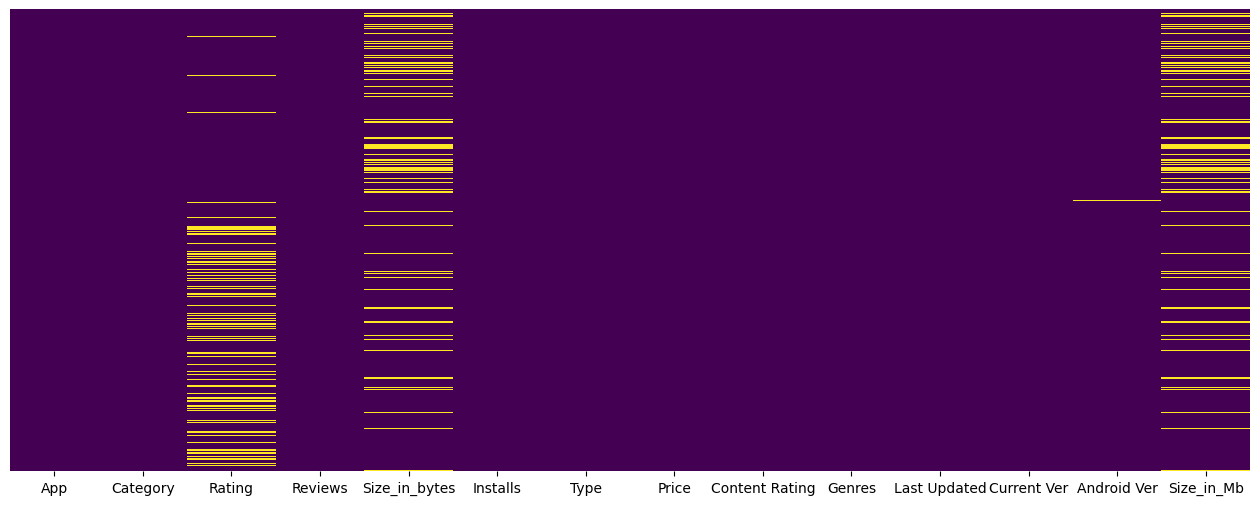

In [126]:
# plot missing values
plt.figure(figsize=(16, 6))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

Text(0.5, 1.0, 'Percentage of missing values in each column')

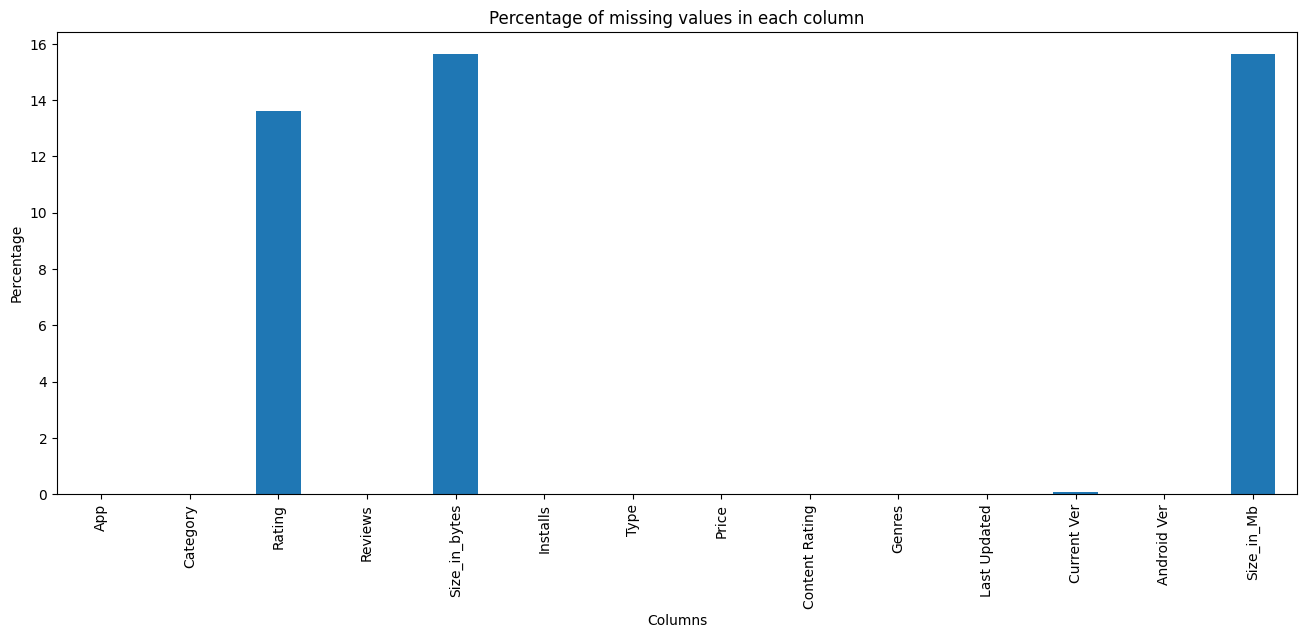

In [127]:
# make a figuresize
plt.figure(figsize=(16, 6))
# plot null values by their percentage in each column
missing_percentage = df.isnull().sum() / len(df) * 100
missing_percentage.plot(kind='bar')
plt.xlabel('Columns')
plt.ylabel('Percentage')
plt.title('Percentage of missing values in each column')

<Axes: >

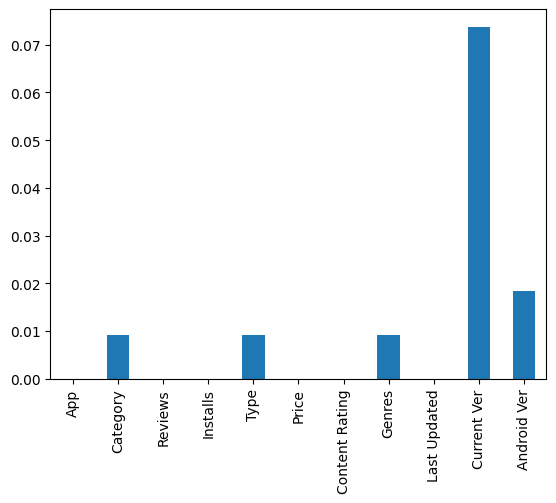

In [128]:
missing_percentage[missing_percentage < 1].plot(kind='bar')
